<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression evaluation and loss functions

_Instructor: Aymeric Flaisler_

---

### LEARNING OBJECTIVES

* After this lesson, you will be able to:
    - distinguish different types of loss functions
    
---

### STUDENT PRE-WORK
* Before this lesson, you should already be able to
    - implement ordinary least squares regression
    - evaluate model performance with mean squared error and R squared
    - determine the residuals

## Loss functions

Regressions model the relationship **between predictors and dependent variables**. But the relationship they are measuring and the process of "fitting" models is centred around the idea of **loss functions**.

The loss function is **what is optimised** by the process of regression. Think of the term "loss function" sort of like the **greater the value, the more information about your target variable is "lost"** by your model.

---

## Least squares loss

As you may recall from yesterday, the most common loss function in linear regression is the **least squares loss**. It is called least squares loss because it minimizes the sum of the squared errors/residuals.

$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

This is called a **loss function**. The "loss" considered is the increasing sum of squared errors, which indicate a **bad fit between predictors and outcome**. We minimize the loss by finding the smallest sum.

## Least Absolute Deviations (LDA)

An alternative loss function minimizes the **Least Absolute Deviations (LDA)**:

$$\sum_{i}{|\hat{y}_i - y_i |}$$

---

## Packages and data

Load, for now, the following data and packages.

The data is a subset of the football combine dataset. The concept of "train" and "test" datasets is going to repeatedly come up throughout the course. Imagine training data as the data you have now, and the test data as unobserved data on which you validate the performance of your model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
combine = pd.read_csv('./datasets/combine_train.csv')

---

### 1. Set up variables and build a regression predicting target from predictor (for example, let's predict the height with the weight)

Again, your regression should just be a single target and single predictor for now.

You can choose any target and predictor that interests you, and you can subset the data if you like as well (subsetting on position, for example, is likely to improve a regression.)

You may use statsmodels or scikit-learn to build the regression:

```python
    import statsmodels.api as sm
    from sklearn.linear_model import LinearRegression
```

Note that sklearn's regression expects your x variable to be a 2D matrix with rows, columns. See here:

http://stackoverflow.com/questions/30813044/sklearn-found-arrays-with-inconsistent-numbers-of-samples-when-calling-linearre

In [3]:
combine.head()

,id,Year,Name,Position,HeightFeet,HeightInches,Weight,Arms,Hands,FortyYD,...,Bench,Round,College,Pick,PickRound,PickTotal,FirstName,LastName,HeightInchesTotal,Wonderlic
0,8984,2013,Quanterus Smith,DE,6,5.0,250,33.25,10.375,0.0,...,0,5,Western Kentucky,13(146),13,146,Quanterus,Smith,77.0,0
1,9002,2013,Abry Jones,DT,6,3.0,313,35.00,9.750,0.0,...,30,0,NaN,NaN,0,0,Abry,Jones,75.0,0
2,9004,2013,Bennie Logan,DT,6,2.0,309,34.00,10.250,0.0,...,30,3,LSU,5(67),5,67,Bennie,Logan,74.0,0
3,9012,2013,John Boyett,FS,5,10.0,204,30.50,8.500,0.0,...,27,6,Oregon,24(192),24,192,John,Boyett,70.0,0
4,9018,2013,Bacarri Rambo,FS,6,0.0,211,31.00,9.250,0.0,...,17,6,Georgia,23(191),23,191,Bacarri,Rambo,72.0,0


In [10]:
# we subset the data for easier analysis
wrs = combine[combine.Position == 'WR']
#array .values
weight = wrs[['Weight']].values

height = wrs.HeightInchesTotal.values

### Fit your model with your variable like (weight, height):

#### With Sklearn:

In [12]:
from sklearn.linear_model import LinearRegression

In [20]:
# A:

#step1 - instantiate model
model = LinearRegression()
#step2 - create X, y
X = weight
y = height
#step3 - fit model
model.fit(X,y)
# Print coefficients
# B1, B0
print(model.coef_[0] , model.intercept_ )

#step4 - socre
model.score(X,y)

0.10590879627067845 51.63135624371134


0.4961672458176028

0.10590879627067845 51.63135624371134


#### With StatsModels: 

In [21]:
import statsmodels.api as sm

In [24]:
# A:

mod2 = sm.OLS(height, sm.add_constant(weight)).fit()
# Print Summary
mod2.params


array([51.63135624,  0.1059088 ])

In [30]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     576.1
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           3.88e-89
Time:                        10:18:54   Log-Likelihood:                -1117.2
No. Observations:                 587   AIC:                             2238.
Df Residuals:                     585   BIC:                             2247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.6314      0.889     58.069      0.000      49.885      53.378
x1             0.1059      0.004     24.002      0.000       0.097       0.115
==============================================================================
Omnibus:                        1.185   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.026
Skew:                           0.021   Prob(JB):                        0.599
Kurtosis:                       3.200   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

### 2. Calculate the mean squared error for your regression and the baseline model

**Mean squared error** is just the mean of your squared errors. It is typically used as a metric in place of the sum of errors.

Either calculate the mean squared error for your regression and baseline model by hand, or use statsmodels/sklearn.

In [39]:
from sklearn.metrics import mean_squared_error

In [ ]:
# this might help you defining the baseline model:
# np.tile(np.mean(height), len(height))

In [40]:
np.tile(np.mean(height), len(height))

array([72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91162692,
       72.91162692, 72.91162692, 72.91162692, 72.91162692, 72.91

In [41]:
wr_height_hat = model.predict(weight)

mod_mse = mean_squared_error(height, wr_height_hat)
base_mse = mean_squared_error(height, np.tile(np.mean(height), len(height)))

print ('Model mse:', mod_mse)
print ('Baseline mse:', base_mse)

Model mse: 2.63444128125336
Baseline mse: 5.2288011436025865


In [42]:
print (mod_mse, base_mse)

2.63444128125336 5.2288011436025865


---

### 3. Plot 
### a) the target versus the predictor 

Add the regression line and the baseline model line for the target versus predictor chart.



In [43]:
def plot_regression_wbaseline(x, y, yhat):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    ymean = np.mean(y)
    
    ax.scatter(x, y, color='steelblue', s=70, label='true y')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = np.min(yhat)
    max_yhat = np.max(yhat)
    
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=4, alpha=0.7, label='regression model')
    ax.plot([min_x, max_x], [ymean, ymean], color='darkgoldenrod',
            linewidth=4, alpha=0.7, label='baseline model')
    
    ax.set_xlabel('weight', fontsize=16)
    ax.set_ylabel('height', fontsize=16)
    
    plt.title('Regression With Baseline')
    plt.legend(loc='upper left')
    
    plt.show()

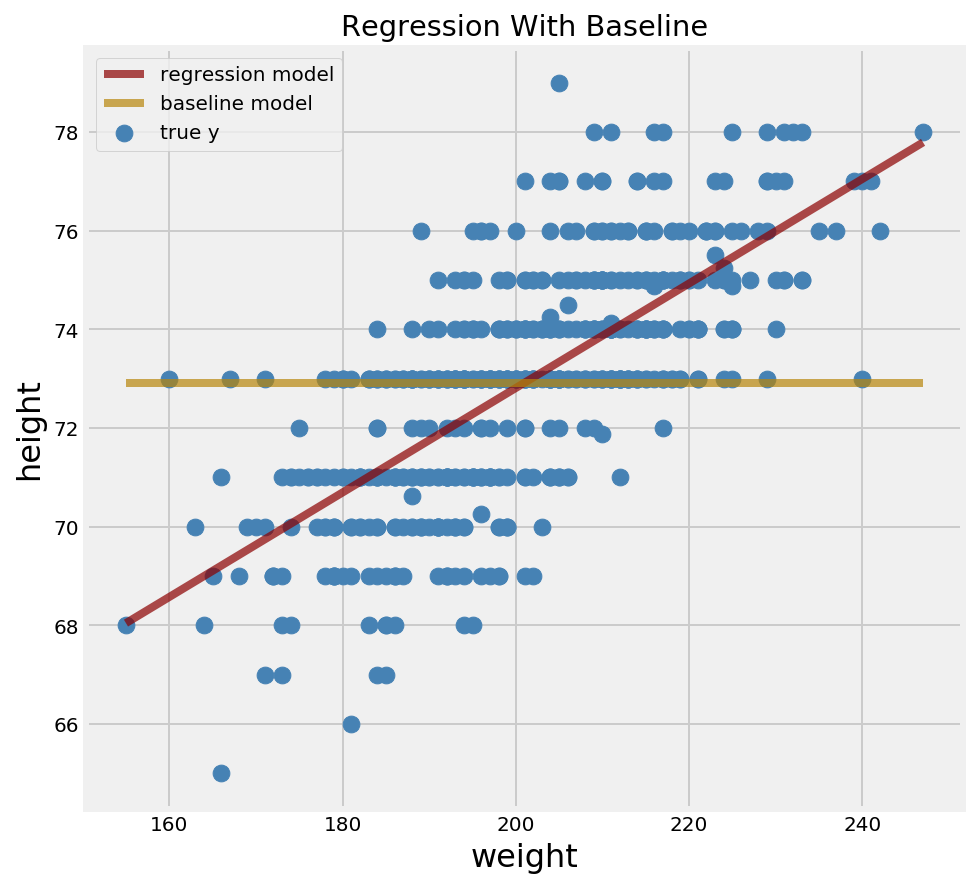

In [44]:
beta0 = model.intercept_
beta1 = model.coef_[0]
plot_regression_wbaseline(weight, height, wr_height_hat)

### b) the true values versus the predicted values

Add a line that would pass through the origin with slope one on the  true values versus the predicted values chart.

What do the lines represent in each chart?

In [45]:
def plot_y_yhat(y, yhat):

    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()

    ax.scatter(y, yhat, color='darkgoldenrod', s=70, label='yhat - true y')

    max_val = np.max(y)
    min_val = np.min(y)

    ax.plot([min_val, max_val], [min_val, max_val], color='darkgreen',
            linewidth=4.0, alpha=0.7, label='perfect model')

    ax.set_xlabel('true y', fontsize=16)
    ax.set_ylabel('yhat', fontsize=16)

    plt.legend(loc='upper left')

    plt.show()

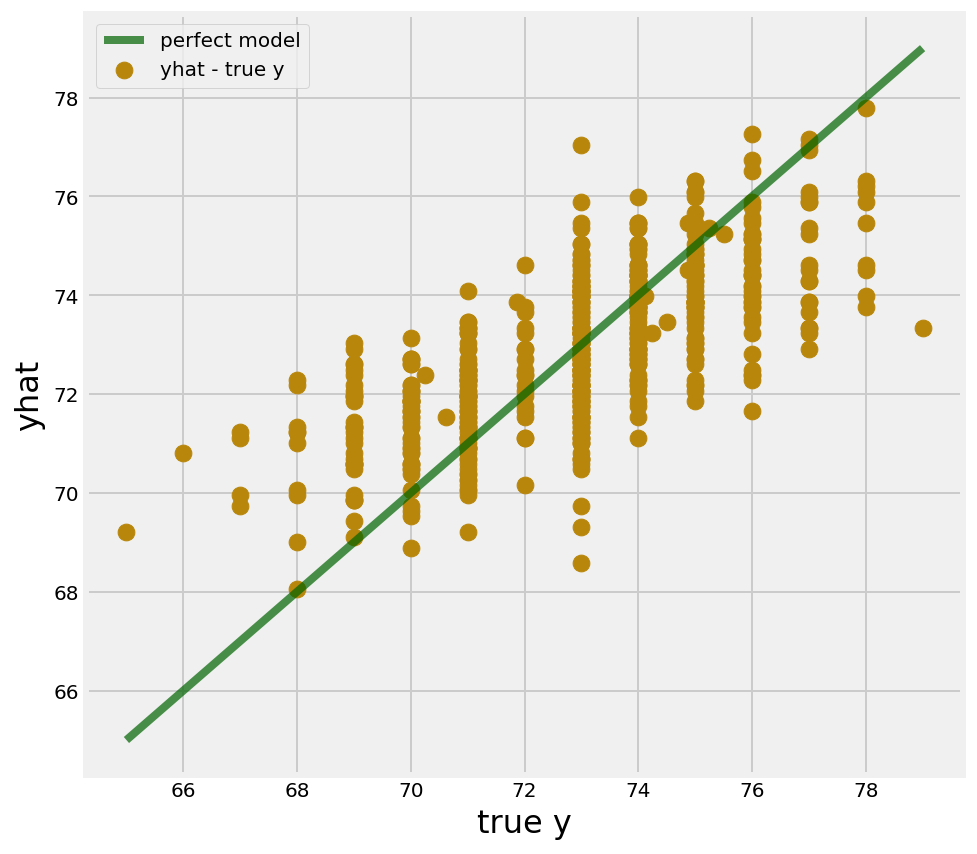

In [46]:
plot_y_yhat(height, wr_height_hat)

---

## $R^2$ of the regression

Recall that the $R^2$ metric calculates the variance explained by your model over the baseline model.

The formula, to refresh your memory, is:

### $$ R^2 = 1 - \frac{var(residuals)}{var(y)} $$

### 4. Calculate the $R^2$ either by hand or using sklearn or statsmodels

In [47]:
from sklearn.metrics import r2_score

In [50]:
# wr_height_r2 = r2_score(...?)
# takes true values and the predictive values
wr_height_r2 = r2_score(height,wr_height_hat)
print ('regression R^2:', wr_height_r2)

regression R^2: 0.49616724581760274


---

### 5. Remove outliers and build a non-outlier regression (15min)

Set a criteria for outliers that removes any value deviating more than 1.5 standard deviations from the mean. (Extremely strict).

Build a new regression with the non-outlier values.

In [54]:
combine

,id,Year,Name,Position,HeightFeet,HeightInches,Weight,Arms,Hands,FortyYD,...,Bench,Round,College,Pick,PickRound,PickTotal,FirstName,LastName,HeightInchesTotal,Wonderlic
0,8984,2013,Quanterus Smith,DE,6,5.0,250,33.250,10.375,0.00,...,0,5,Western Kentucky,13(146),13,146,Quanterus,Smith,77.0,0
1,9002,2013,Abry Jones,DT,6,3.0,313,35.000,9.750,0.00,...,30,0,NaN,NaN,0,0,Abry,Jones,75.0,0
2,9004,2013,Bennie Logan,DT,6,2.0,309,34.000,10.250,0.00,...,30,3,LSU,5(67),5,67,Bennie,Logan,74.0,0
3,9012,2013,John Boyett,FS,5,10.0,204,30.500,8.500,0.00,...,27,6,Oregon,24(192),24,192,John,Boyett,70.0,0
4,9018,2013,Bacarri Rambo,FS,6,0.0,211,31.000,9.250,0.00,...,17,6,Georgia,23(191),23,191,Bacarri,Rambo,72.0,0
5,9028,2013,Michael Mauti,ILB,6,2.0,243,32.500,10.500,0.00,...,28,7,Penn State,7(213),7,213,Michael,Mauti,74.0,0
6,9037,2013,Khaled Holmes,OC,6,3.0,302,35.000,10.250,0.00,...,13,4,USC,24(121),24,121,Khaled,Holmes,75.0,0
7,9043,2013,Zach Allen,OG,6,2.0,332,33.500,9.875,0.00,...,32,0,NaN,NaN,0,0,Zach,Allen,74.0,0
8,9058,2013,Brian Winters,OG,6,4.0,320,32.750,9.750,0.00,...,9,3,Kent State,10(72),10,72,Brian,Winters,76.0,0
9,9064,2013,Jelani Jenkins,OLB,6,0.0,243,32.250,9.375,0.00,...,27,4,Florida,7(104),7,104,Jelani,Jenkins,72.0,0


In [79]:
# df = pd.DataFrame({...
# mask = ...

df2 = combine[['HeightInchesTotal', 'Weight']].copy()
hmean = np.mean(df2.HeightInchesTotal)
hstd = np.std(df2.HeightInchesTotal)
outlier_mask = (df2.HeightInchesTotal > hmean + hstd * 1.5) | (df2.HeightInchesTotal < hmean - hstd * 1.5)
# ~ is not
df2 = df2[~outlier_mask]


In [81]:
mod_no = LinearRegression()
X, y = df2[['Weight']] , df2.HeightInchesTotal
mod_no.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
mod_no.intercept_ , mod_no.coef_

(65.65600958577252, array([0.03434895]))

---

### 6. Plot the regression with the outliers and without the outliers

Use the full data for both (not the data with outliers removed).

How do the regression lines change (if at all). Why?

In [89]:
wr_height_hat_no = mod_no.predict(df2[['Weight']])

In [90]:
def plot_regressions(x, y, yhat1, yhat2):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
        
    ax.scatter(x, y, color='steelblue', s=70, label='true y', alpha=0.5)
    
    min_x, max_x = np.min(x), np.max(x)
    
    min_yhat1 = np.min(yhat1)
    max_yhat1 = np.max(yhat1)
    
    min_yhat2 = np.min(yhat2)
    max_yhat2 = np.max(yhat2)
    
    ax.plot([min_x, max_x], [min_yhat1, max_yhat1], color='darkred',
            linewidth=4, alpha=0.7, label='first regression model')
    ax.plot([min_x, max_x], [min_yhat2, max_yhat2], color='darkgoldenrod',
            linewidth=4, alpha=0.7, label='no outlier regression model')
    
    ax.set_xlabel('weight', fontsize=16)
    ax.set_ylabel('height', fontsize=16)
    
    plt.legend(loc='upper left')
    
    plt.show()

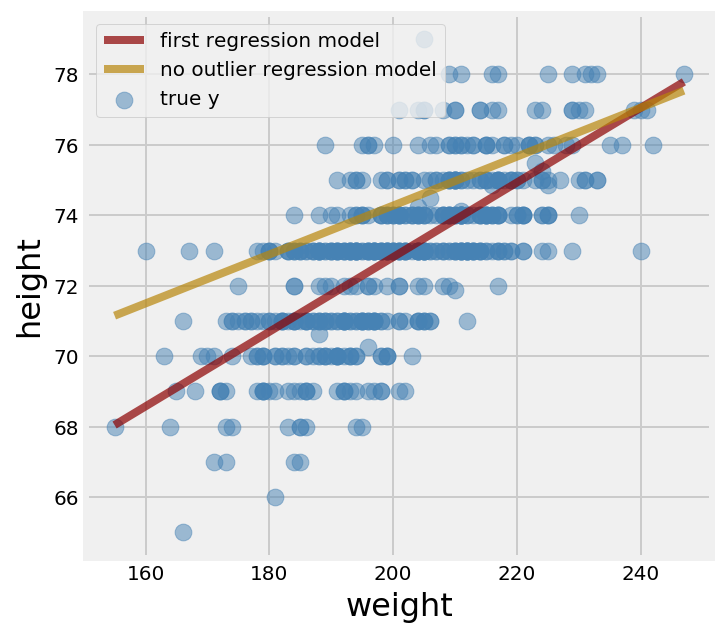

In [91]:
plot_regressions(weight, height, wr_height_hat, wr_height_hat_no)

---

### 7. Calculate the $R^2$ of your outlier-removed model and compare it to the original model

Which performs better? Why do you think that is?


In [92]:
wr_height_no_r2 = r2_score(y, wr_height_hat_no)

print ('regression R^2:', wr_height_r2)
print ('regression outliers removed R^2:', wr_height_no_r2)

regression R^2: 0.49616724581760274
regression outliers removed R^2: 0.39115728762170765


---

## Examining residuals

Looking at the residuals (errors) of your model is a good practice. Normally distributed residuals indicate that the assumptions of linear regression are probably being met, which in turn means that your regression is modeling the linear relationship appropriately.

### 8. Plot a histogram of the residuals from the original and no-outlier model

In [95]:
height_resid = height - wr_height_hat
height_no_resid = y - wr_height_hat_no

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


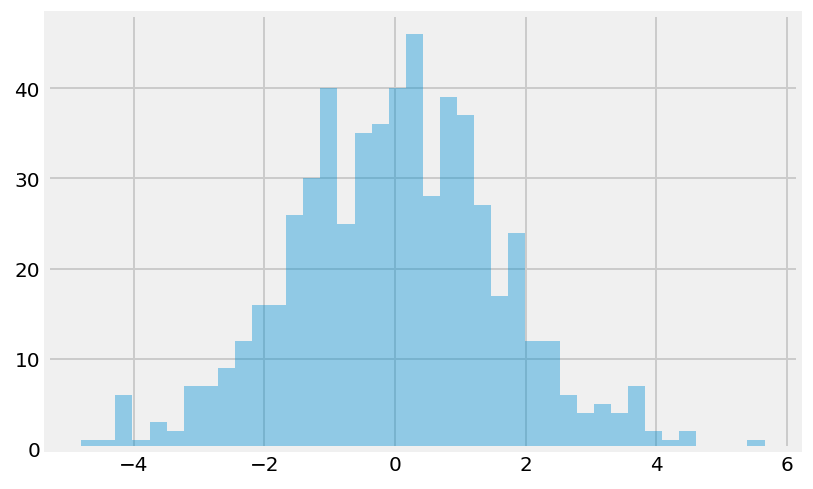

In [96]:
sns.distplot(height_resid, bins=40, hist=True, kde=False)
plt.show()

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


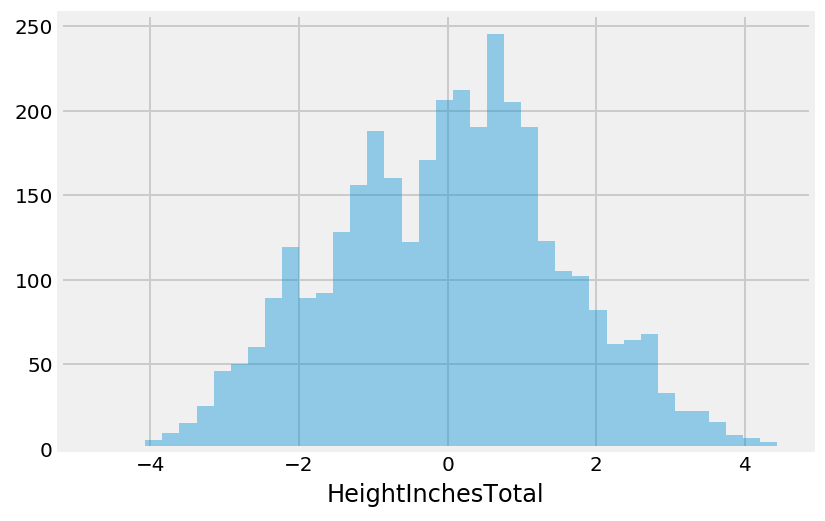

In [97]:
sns.distplot(height_no_resid, bins=40, hist=True, kde=False)
plt.show()

---

## Validating the model against a test set

Load in the test set file for the combine data. Pull out the corresponding target and predictor variables for the test set.

It is best practice after you build a model to, if possible, validate it against held out data. If it performs as well or nearly as well, you can be more sure that the model you've created is in fact making a correct inference about the linear relationship between variables for the overall population.

### 9. Get the $R^2$ value for your original model predicting values from the test data

Compare this to the $R^2$ on your training data.

In [103]:
combine_test = pd.read_csv('./datasets/combine_test.csv')

In [105]:
wrs_test = combine_test[combine_test.Position == 'WR']
X_test = wrs_test[['Weight']].values
y_test = wrs_test.HeightInchesTotal.values

In [111]:
height_test_yhat = model.predict(X_test)
height_test_r2 = r2_score(y_test,height_test_yhat)

print ('R^2 on train set:', wr_height_r2)
print ('R^2 on test set:', height_test_r2)

R^2 on train set: 0.49616724581760274
R^2 on test set: 0.5365135360716536


### 10. Calculate the mse for the test data and baseline model on test data

In [112]:
mod_test_mse = mean_squared_error(y_test, height_test_yhat)
base_test_mse = mean_squared_error(height_test, np.tile(np.mean(height_test), len(height_test)))

print ('Model on test mse:', mod_test_mse)
print ('Baseline test mse:', base_test_mse)

Model on test mse: 2.0788853467505413
Baseline test mse: 4.485320518598642


### 11. Plot the regression applied to test data against the test data baseline model

Look visually how it performs versus just guessing the mean of the target in the test data.


In [113]:
# Tips: use the function plot_regression_wbaseline we defined above

## Conclusions

* Main types of loss functions
* Ordinary least squares regression with statsmodels and sklearn
* model evaluation with mean squared error and R2
* examination of residuals
* tested the model